## __0. Bibliotecas__

In [1]:
# mover os imports para cá

## __1. Datasets__

In [2]:
# carregar todos os datasets aqui

## __2. Pré-processamento dos dados__

Uma vez que vamos trabalhar apenas com pontos no plano cartesiano, precisamos transformar nossos dados em uma **matriz bidimensional**. Para isso, utilizaremos a técnica **SVD** (Singular Value Decomposition) que reduz uma matriz *n*-dimensional em uma matriz *k*-dimensional, onde *k* é o número de fatores latentes. Para nosso trabalho, *k* é sempre 2.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
iris = datasets.load_iris() # apenas o iris tem duas classes linearmente separáveis
digits = datasets.load_digits()
wine = datasets.load_wine()
cancer = datasets.load_breast_cancer()

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['Target'] = pd.DataFrame(iris.target)


In [4]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=2, n_iter=4, random_state=42)
data_points = svd.fit_transform(df)

In [5]:
df_new = pd.DataFrame(data_points, columns=['x','y'])
df_new['Target'] = pd.DataFrame(iris.target)
df_new

,x,y,Target
0,5.847277,2.461922,0
1,5.511162,2.138145,0
2,5.386715,2.244409,0
3,5.376754,2.035803,0
4,5.810511,2.483696,0
...,...,...,...
145,9.419625,-1.095265,2
146,8.766359,-1.230153,2
147,9.220995,-1.063022,2
148,9.300111,-1.164300,2


## __3. Envoltória Convexa__


#### Implementação do algoritmo de Gift Wrapping(Jarvis March) para determinar as envoltórias das amostras. Este algoritmo possui complexidade $O(nh)$, sendo $n$ o número de pontos e $h$ os pontos que efetivamente estão na envoltória.

In [6]:
# classe para representar pontos bidimensionais no espaço
class Ponto:
    def __init__(self, x, y, rotulo):
        self.x = x
        self.y = y
        self.rotulo = rotulo

In [7]:
#calculando o produto vetorial entre segmentos ab e ac, a = ancora
def produto_vetorial(ancora, b, c):
    return ((b.x-ancora.x)*(c.y-ancora.y) - (c.x-ancora.x)*(b.y-ancora.y))


In [8]:
# encontrando o ponto mais embaixo em relação a y
def mais_a_esquerda(pontos):
    min = 0
    for i in range(1,len(pontos)):
        if pontos[i].y < pontos[min].y:
            min = i
        elif pontos[i].y == pontos[min].y:
            if pontos[i].x < pontos[min].x: # em caso de empate, escolhemos o ponto mais a esquerda
                min = i
    return min

In [9]:
# funcao que recebe um vetor de pontos, e retorna lista com pontos da envoltoria convexa
def gift_wrapping(pontos):
    i_esquerda = mais_a_esquerda(pontos) # guarda indice do ponto mais a esquerda
    p = pontos[i_esquerda]

    prox = (i_esquerda + 1) % len(pontos)

    teste = 0

    envoltoria = [] #incializa envoltoria vazia
    envoltoria.append(p) # adiciona ponto mais à esquerda a envoltoria

    q = p
    while(True):
        # calcula o prox ponto da envoltoria
        while(teste != len(pontos)):
            det = produto_vetorial(q, pontos[prox], pontos[teste])
            if det < 0: # se for negativo, pontos[teste] tem o menor angulo polar,sendo o prox ponto da envoltoria
                prox = teste
            # atualiza teste
            teste = teste+1;

        # se tivermos retornados a ancora, loop acaba
        if p == pontos[prox]:
            break

        # adiciona ponto a envoltoria
        envoltoria.append(pontos[prox])

        # atualiza variáveis
        q = pontos[prox]
        prox = (prox + 1) % len(pontos)
        teste = 0

    return envoltoria

In [10]:
#pontos = [Ponto(x, y) for x, y in data_points]
pontos = [Ponto(x, y, r) for x, y, r in df_new.values]
envoltoria = gift_wrapping(pontos)

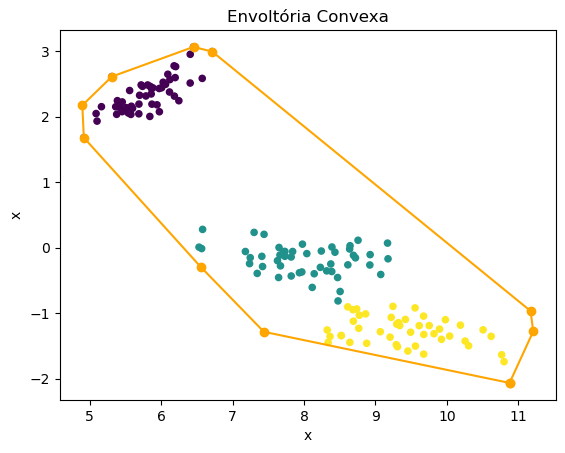

In [11]:
# Criando listas separadas para nomes e idades
Xs1 = [ponto.x for ponto in pontos]
Ys1 = [ponto.y for ponto in pontos]

Xs2 = [ponto.x for ponto in envoltoria]
Ys2 = [ponto.y for ponto in envoltoria]

# Adicionando o primeiro ponto da envoltória ao final para fechar a forma
Xs2.append(envoltoria[0].x)
Ys2.append(envoltoria[0].y)

# Plotando um gráfico de barras
plt.scatter(Xs1, Ys1, c=iris.target, s=20)
plt.plot(Xs2, Ys2, linestyle='-', marker='o', color='orange')
plt.xlabel('x')
plt.ylabel('x')
plt.title('Envoltória Convexa')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 640x480 with 0 Axes>

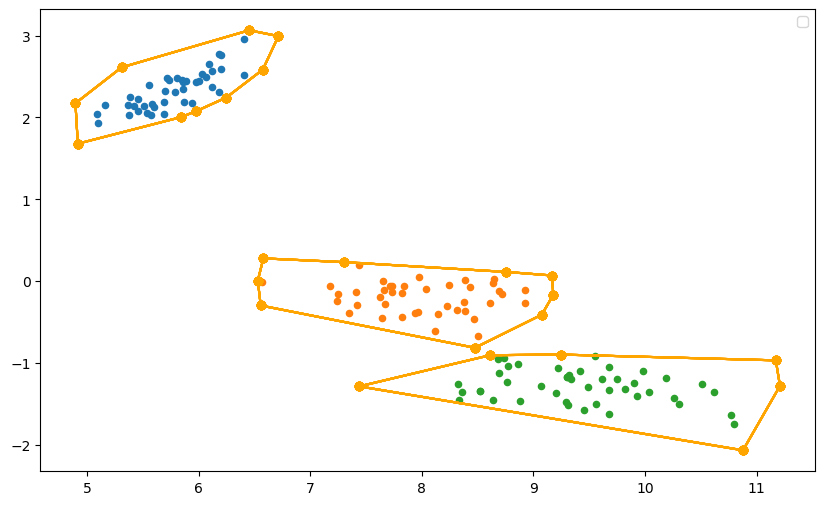

In [12]:
# testando envoltoria com a matriz bidimensional
plt.clf()
plt.figure(figsize = (10, 6))
names = iris.target_names
label = (iris.target).astype(int)
colors = ['b','r','g']
for i in range(len(names)):
    bucket = df_new[df_new['Target'] == i]
    bucket = bucket.iloc[:,[0,1,2]].values
    bucket_points = [Ponto(x, y, r) for x, y, r in bucket]
    envoltoria[i] = gift_wrapping(bucket_points)
    Xs1 = [ponto.x for ponto in bucket_points]
    Ys1 = [ponto.y for ponto in bucket_points]
    plt.scatter(Xs1, Ys1, s=20)
    Xs2 = [ponto.x for ponto in envoltoria[i]]
    Ys2 = [ponto.y for ponto in envoltoria[i]]
    Xs2.append(envoltoria[i][0].x)
    Ys2.append(envoltoria[i][0].y)
    for j in envoltoria:
        plt.plot(Xs2, Ys2, linestyle='-', marker='o', color='orange')
plt.legend()
plt.show()

In [13]:
'''#testando envoltoria com matriz inteira
plt.clf()
plt.figure(figsize = (10, 6))
names = iris.target_names
label = (iris.target).astype(int)
colors = ['b','r','g']
plt.title('Petal Width vs Petal Length')
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
for i in range(len(names)):
    bucket = df[df['Target'] == i]
    bucket = bucket.iloc[:,[2,3,4]].values
    bucket_points = [Ponto(x, y, r) for x, y, r in bucket]
    envoltoria[i] = gift_wrapping(bucket_points)
    Xs1 = [ponto.x for ponto in bucket_points]
    Ys1 = [ponto.y for ponto in bucket_points]
    plt.scatter(Xs1, Ys1, s=20)
    Xs2 = [ponto.x for ponto in envoltoria[i]]
    Ys2 = [ponto.y for ponto in envoltoria[i]]
    Xs2.append(envoltoria[i][0].x)
    Ys2.append(envoltoria[i][0].y)
    for j in envoltoria:
        plt.plot(Xs2, Ys2, linestyle='-', marker='o', color='orange')
plt.legend()
plt.show()'''

"#testando envoltoria com matriz inteira\nplt.clf()\nplt.figure(figsize = (10, 6))\nnames = iris.target_names\nlabel = (iris.target).astype(int)\ncolors = ['b','r','g']\nplt.title('Petal Width vs Petal Length')\nplt.xlabel(iris.feature_names[2])\nplt.ylabel(iris.feature_names[3])\nfor i in range(len(names)):\n    bucket = df[df['Target'] == i]\n    bucket = bucket.iloc[:,[2,3,4]].values\n    bucket_points = [Ponto(x, y, r) for x, y, r in bucket]\n    envoltoria[i] = gift_wrapping(bucket_points)\n    Xs1 = [ponto.x for ponto in bucket_points]\n    Ys1 = [ponto.y for ponto in bucket_points]\n    plt.scatter(Xs1, Ys1, s=20)\n    Xs2 = [ponto.x for ponto in envoltoria[i]]\n    Ys2 = [ponto.y for ponto in envoltoria[i]]\n    Xs2.append(envoltoria[i][0].x)\n    Ys2.append(envoltoria[i][0].y)\n    for j in envoltoria:\n        plt.plot(Xs2, Ys2, linestyle='-', marker='o', color='orange')\nplt.legend()\nplt.show()"

## __4. Varredura Linear__


#### Implementação da varredura linear para verificação de intercessão de segmentos das envoltórias.


In [14]:
def on_segment(p1, p2, p):
    return min(p1.x, p2.x) <= p.x <= max(p1.x, p2.x) and min(p1.y, p2.y) <= p.y <= max(p1.y, p2.y)

In [15]:
def intersect(p1, p2, p3, p4):
    d1 = produto_vetorial(p3, p4, p1)
    d2 = produto_vetorial(p3, p4, p2)
    d3 = produto_vetorial(p1, p2, p3)
    d4 = produto_vetorial(p1, p2, p4)

    if ((d1 > 0 and d2 < 0) or (d1 < 0 and d2 > 0)) and \
        ((d3 > 0 and d4 < 0) or (d3 < 0 and d4 > 0)):
        return True

    elif d1 == 0 and on_segment(p3, p4, p1):
        return True
    elif d2 == 0 and on_segment(p3, p4, p2):
        return True
    elif d3 == 0 and on_segment(p1, p2, p3):
        return True
    elif d4 == 0 and on_segment(p1, p2, p4):
        return True
    else:
        return False

In [16]:
def any_segment_intersect(envoltoria_1, envoltoria_2):
    n = len(envoltoria_1)
    m = len(envoltoria_2)
    for i in range(n):
        for j in range(m):
            if intersect(envoltoria_1[i], envoltoria_1[(i + 1) % n], envoltoria_2[j], envoltoria_2[(j + 1) % m]):
                return True

    return False

In [17]:
res1 = any_segment_intersect(envoltoria[0], envoltoria[1]) # deve retornar False
res2 = any_segment_intersect(envoltoria[1], envoltoria[2]) # deve retornar True
res3 = any_segment_intersect(envoltoria[0], envoltoria[2]) # deve retornar False

In [18]:
print(res1)
print(res2)
print(res3)

False
False
False


## __5. Algoritmo de varredura para achar pontos mais próximos entre dois conjuntos__


##### __5.1) Implementando a classe PontoRotulado:__


In [19]:
#classe ponto rotulado, contém um Ponto e um rótulo(0 ou 1) (necessária para rodar o closest pair)
class PontoRotulado:
    def __init__(self, x, y, rotulo):
        self.ponto = Ponto(x, y)
        self.rotulo = rotulo

#### __5.2) Algoritmo de varredura__
Este algoritmo tem em seu melhor caso complexiadade $O(n.log(n))$. Em seu pior caso, essa complexidade aumenta para $O(n^2)$. Dada a restrição de que cada ponto do par de pontos retornados precisa ser de um conjunto de pontos diferentes, o parâmetro de distância mínima, usado no algoritmo, tende a ter valores maiores do que se executássemos o algoritmo sem essa restrição. Portanto, espera-se que a complexidade executada esteja entre o caso médio e o pior caso do algoritmo.

In [20]:
import sys
import math

# função que retorna par de pontos rotulados mais próximo entre dois conjuntos de pontos rotulados
def par_mais_proximo(pontos):
    # inicializando variáveis
    p1 = (0,0,0)
    p2 = p1

    # ordena a lista de objetos com base nas coordenadas x dos pontos
    ordenados_X = sorted(pontos, key=lambda obj: obj.x)

    # menor distancia inicializada com valor alto
    min = sys.maxsize

    # variavel do tipo conjunto
    conjunto = set()

    # adiciona ponto mais a esquerda ao conjunto
    conjunto.add(ordenados_X[0])

    # varredura sobre pontos ordenados em X
    for i in range(1, len(ordenados_X)):

        # cria conjunto de pontos a esquerda do ponto atual que possivelmente estao a uma distancia menor que min
        l = set([p for p in conjunto if (p.x >= ordenados_X[i].x - min) and (p.y >= ordenados_X[i].y - min) ])
        
        # cria conjunto de pontos a direita do ponto atual que possivelmente estao a uma distancia menor que min
        r = set([p for p in conjunto if (p.x <= ordenados_X[i].x + min) and (p.y <= ordenados_X[i].y + min)])

        # intercessao de pontos que podem ter distancia menor que d entre si
        intersection = l & r

        # se intercessao for vazia, passa para o proximo ponto ordenado
        if len(intersection) == 0:
            continue

        # loop sobre a interseção dos conjuntos l e r
        for val in intersection:
            if ordenados_X[i].rotulo == val.rotulo:
                continue

            # Calcula a distância entre os pontos
            dist = math.sqrt(math.pow(ordenados_X[i].x - val.x, 2) + math.pow(ordenados_X[i].y - val.y, 2))

            # Atualiza a distância mínima, se necessário
            if min > dist:
                min = dist
                # guardando o par de pontos mais prox até o momento
                p1 = ordenados_X[i]
                p2 = val
                
        # precisa disso ? #gabi
        conjunto.add(ordenados_X[i])

    return p1, p2


## __6. Equação da reta classificadora__


##### Para qualquer equação linear $y = mx + b$, as perpendiculares à ela terão todas uma inclinação de $-1/m$, o recíproco oposto da inclinação original. Para encontrar uma reta perpendicular de um dado segmento $p1p2$, sendo que esta reta também passa por um ponto específico $(x, y)$, nesse caso, a mediana do segmento, basta resolver a equação $y = (-1/m)x + b$, substituindo os valores conhecidos de $m$, $x$ e $y$ para resolver $b$.

In [21]:
# retorna  m e b da equação da reta perpendicular
def reta_perpendicular(p1, p2):
    inclinacao_original = (p1.y-p2.y)/(p1.x-p2.x)

    inclinacao_perpendicular = (-1.0)/inclinacao_original
    # calcula a mediana
    mediana = ((p1.x + p2.x)/2, (p1.y + p2.y)/2) # ponto da mediana
    print("mediana %d", mediana)

    b = mediana[1] - inclinacao_perpendicular * mediana[0]
    return (b, inclinacao_perpendicular)

# função para calcular os valores y da reta dada um inclinação m e intercessao b
def reta(m, b, x):
    return m * x + b

# teste dos pontos mais próximos + reta perpendicular


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 640x480 with 0 Axes>

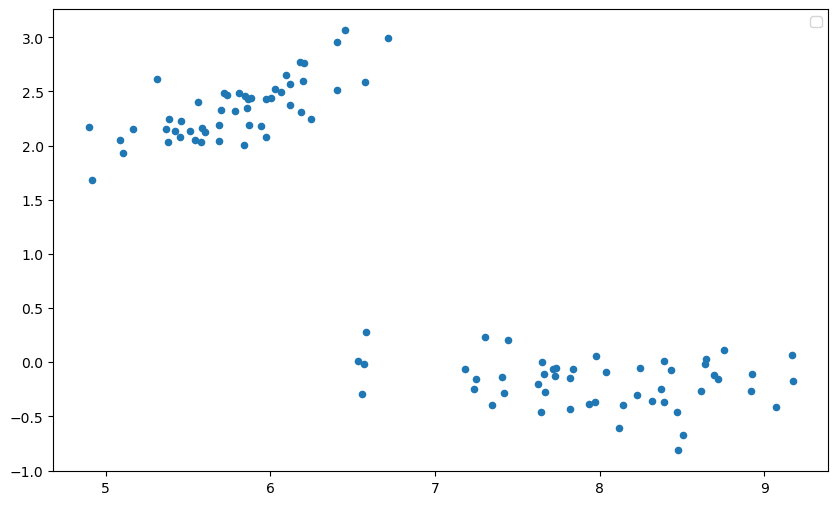

In [22]:
# teste com dois rotulos
plt.clf()
plt.figure(figsize = (10, 6))
names = iris.target_names
label = (iris.target).astype(int)
colors = ['b','r','g']

#for i in range(len(names)-1):

conjuntoA = df_new[df_new['Target'] == 0]
conjuntoB = df_new[df_new['Target'] == 1]
uniao = [conjuntoA, conjuntoB]
bucket = pd.concat(uniao)
bucket = bucket.iloc[:,[0,1,2]].values
bucket_points = [Ponto(x, y, r) for x, y, r in bucket]

Xs1 = [ponto.x for ponto in bucket_points]
Ys1 = [ponto.y for ponto in bucket_points]
plt.scatter(Xs1, Ys1, s=20)
Xs2 = [ponto.x for ponto in envoltoria[i]]
Ys2 = [ponto.y for ponto in envoltoria[i]]
Xs2.append(envoltoria[i][0].x)
Ys2.append(envoltoria[i][0].y)

plt.legend()
plt.show()

In [23]:
p3, p4 = par_mais_proximo(bucket_points)
P3 = Ponto(p3.x, p3.y, p3.rotulo)
P4 = Ponto(p4.x, p4.y, p4.rotulo)

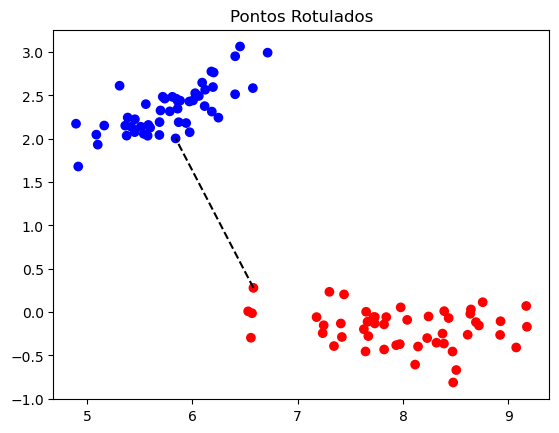

In [24]:
lista_de_objetos = bucket_points
# Cores associadas a cada rótulo
cores = {0: 'blue', 1: 'red'}

# Criando listas de coordenadas e cores
coordenadas_x = [obj.x for obj in lista_de_objetos]
coordenadas_y = [obj.y for obj in lista_de_objetos]
cores_pontos = [cores[obj.rotulo] for obj in lista_de_objetos]

# Plotando os pontos com cores diferentes
plt.scatter(coordenadas_x, coordenadas_y, c=cores_pontos)
# Adiciona uma linha entre o par de pontos mais próximo
plt.plot([P3.x,P4.x], [P3.y,P4.y], 'k--')

# Adicionando legendas e título
plt.title('Pontos Rotulados')

# Exibindo o gráfico
plt.show()


In [25]:
b, m = reta_perpendicular(P3,P4)

mediana %d (6.210804873818396, 1.1414479793199828)


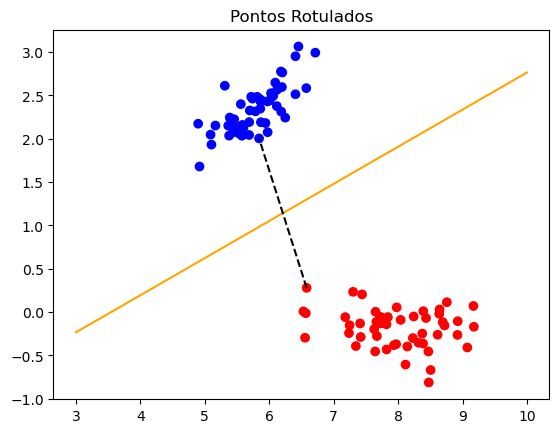

In [26]:
# Gerando valores x para a reta perpendicular
x_valores = np.linspace(3, 10, 50)

# Gerando valores y para a reta perpendicular
y_valores = reta(m, b ,x_valores)

# plotando a reta classificadora
plt.plot(x_valores, y_valores, color='orange')

# Cores associadas a cada rótulo
cores = {0: 'blue', 1: 'red'}

# Criando listas de coordenadas e cores
coordenadas_x = [obj.x for obj in lista_de_objetos]
coordenadas_y = [obj.y for obj in lista_de_objetos]
cores_pontos = [cores[obj.rotulo] for obj in lista_de_objetos]

# Plotando os pontos com cores diferentes
plt.scatter(coordenadas_x, coordenadas_y, c=cores_pontos)
# Adiciona uma linha entre o par de pontos mais próximo
plt.plot([P3.x,P4.x], [P3.y,P4.y], 'k--')

# Adicionando legendas e título
plt.title('Pontos Rotulados')

# Exibindo o gráfico
plt.show()

mediana %d (6.210804873818396, 1.1414479793199828)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 640x480 with 0 Axes>

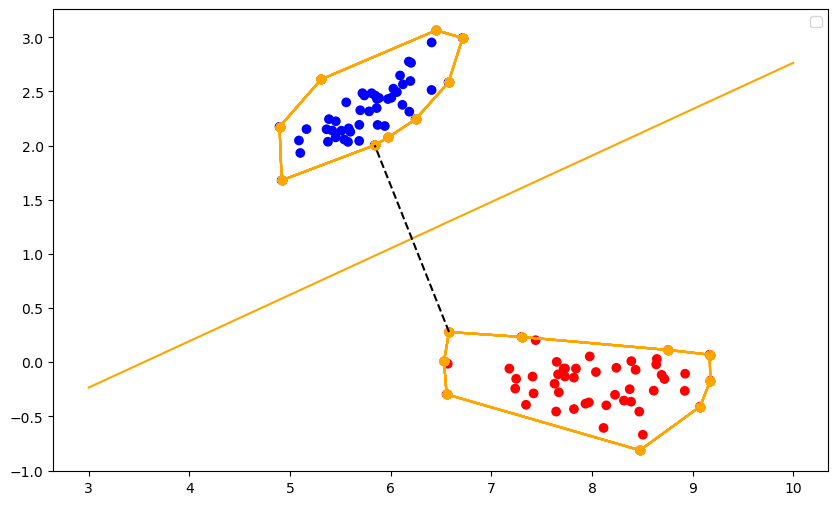

In [27]:
# teste com dois rotulos
plt.clf()
plt.figure(figsize = (10, 6))
names = iris.target_names
label = (iris.target).astype(int)
colors = ['b','r','g']
for i in range(len(names)-1):
    bucket = df_new[df_new['Target'] == i]
    bucket = bucket.iloc[:,[0,1,2]].values
    bucket_points[i] = [Ponto(x, y, r) for x, y, r in bucket]
    envoltoria[i] = gift_wrapping(bucket_points[i])
    Xs1 = [ponto.x for ponto in bucket_points[i]]
    Ys1 = [ponto.y for ponto in bucket_points[i]]
    plt.scatter(Xs1, Ys1, s=20)
    Xs2 = [ponto.x for ponto in envoltoria[i]]
    Ys2 = [ponto.y for ponto in envoltoria[i]]
    Xs2.append(envoltoria[i][0].x)
    Ys2.append(envoltoria[i][0].y)
    for j in envoltoria:
        plt.plot(Xs2, Ys2, linestyle='-', marker='o', color='orange')

uniao = bucket_points[0]+bucket_points[1]
p3, p4 = par_mais_proximo(uniao)
P3 = Ponto(p3.x, p3.y, p3.rotulo)
P4 = Ponto(p4.x, p4.y, p4.rotulo)
b, m = reta_perpendicular(P3,P4)
# Gerando valores x para a reta perpendicular
x_valores = np.linspace(3, 10, 50)

# Gerando valores y para a reta perpendicular
y_valores = reta(m, b ,x_valores)

# plotando a reta classificadora
plt.plot(x_valores, y_valores, color='orange')

# Cores associadas a cada rótulo
cores = {0: 'blue', 1: 'red'}

# Criando listas de coordenadas e cores
coordenadas_x = [obj.x for obj in uniao]
coordenadas_y = [obj.y for obj in uniao]
cores_pontos = [cores[obj.rotulo] for obj in uniao]

# Plotando os pontos com cores diferentes
plt.scatter(coordenadas_x, coordenadas_y, c=cores_pontos)
# Adiciona uma linha entre o par de pontos mais próximo
plt.plot([P3.x,P4.x], [P3.y,P4.y], 'k--')

plt.legend()
plt.show()

## __Breast Cancer Dataset__

### __1.Pré-processamento dos dados__


Fazer k-NN (k-Nearest Neighbors) seguido por t-SNE (t-Distributed Stochastic Neighbor Embedding) em dados serve a diferentes propósitos e está relacionado à análise e visualização de dados em conjuntos de alta dimensionalidade.

k-NN (k-Nearest Neighbors):

Propósito: O algoritmo k-NN é usado para encontrar os k vizinhos mais próximos de um ponto em um espaço de características.
Funcionamento: Cada ponto do conjunto de dados é associado aos seus k vizinhos mais próximos. Isso cria uma representação do relacionamento de proximidade entre os pontos no espaço de alta dimensionalidade.
Aplicações: É útil para classificação e regressão, além de fornecer uma noção da densidade e distribuição local dos dados.
t-SNE (t-Distributed Stochastic Neighbor Embedding):

Propósito: O t-SNE é um algoritmo de redução de dimensionalidade não linear que visa preservar as relações de vizinhança entre os pontos em um espaço de alta dimensão.
Funcionamento: Ele mapeia pontos de alta dimensão para um espaço de baixa dimensão de uma maneira que os pontos semelhantes na alta dimensão ainda sejam próximos na baixa dimensão. O t-SNE é especialmente útil para visualizar a estrutura de clusters em dados complexos.
Aplicações: É amplamente utilizado para visualização e interpretação de padrões em dados de alta dimensão.
Motivação para usar ambos:

O k-NN ajuda a identificar padrões locais, enquanto o t-SNE ajuda na visualização dos padrões gerais e na identificação de clusters.
Após o k-NN, você pode ter uma ideia dos relacionamentos locais entre os pontos. A aplicação do t-SNE ajuda a reduzir ainda mais as dimensões, preservando as relações locais em uma representação mais visualmente compreensível.

c:\Users\gabri\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\gabri\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


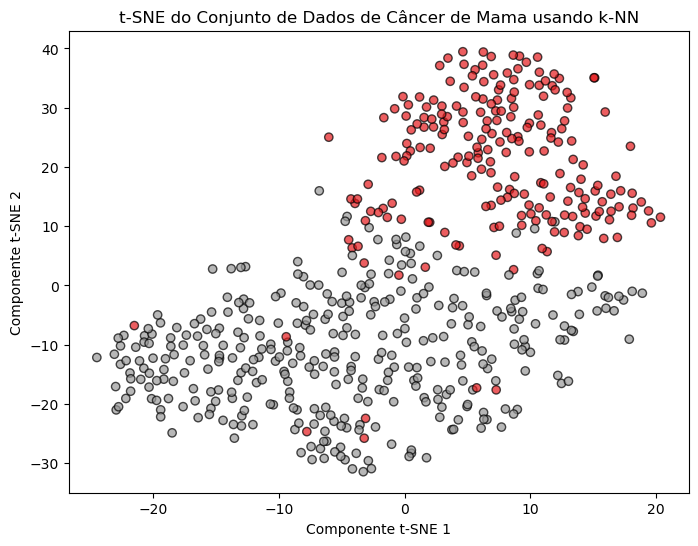

In [28]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
import numpy as np

# Carregar o conjunto de dados de câncer de mama
dados = load_breast_cancer()

# Padronizar os dados
X_padronizado = StandardScaler().fit_transform(dados.data)

# Usar k-NN para encontrar os vizinhos
n_vizinhos = 5
vizinhos = NearestNeighbors(n_neighbors=n_vizinhos)
ajuste_vizinhos = vizinhos.fit(X_padronizado)
distancias, indices = ajuste_vizinhos.kneighbors(X_padronizado)

# Usar t-SNE para redução de dimensionalidade
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_padronizado)

# Adicionar rótulo à matriz de pontos
X_tsne_com_rotulo = np.column_stack((X_tsne, dados.target))

# Plotar os dados reduzidos
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=X_tsne_com_rotulo[:, 2], cmap=plt.cm.Set1, edgecolor='k', alpha=0.7)
plt.title('t-SNE do Conjunto de Dados de Câncer de Mama usando k-NN')
plt.xlabel('Componente t-SNE 1')
plt.ylabel('Componente t-SNE 2')
plt.show()


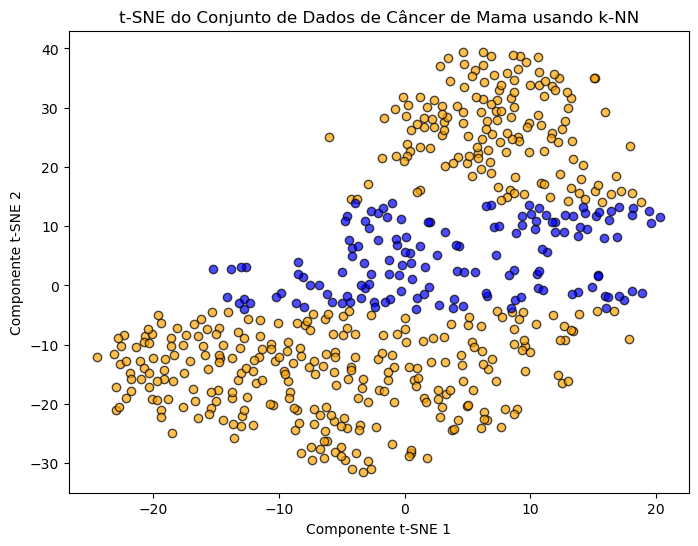

In [29]:

# Adiciona coluna rótulo à matriz de pontos
X_tsne_com_rotulo = np.column_stack((X_tsne, dados.target))

#selecionando dados de treino
treino = X_tsne_com_rotulo[((X_tsne_com_rotulo[:, 1] < -4) & ~(X_tsne_com_rotulo[:,2] == 0)) | ((X_tsne_com_rotulo[:, 1] > 14)  & ~(X_tsne_com_rotulo[:,2] == 1))]

#selecionando dados de teste
teste = X_tsne_com_rotulo[~(X_tsne_com_rotulo[:, 1] < -4)  & ~(X_tsne_com_rotulo[:, 1] > 14)]


# Plotar os dados reduzidos
plt.figure(figsize=(8, 6))
plt.scatter(treino[:, 0], treino[:, 1], c='orange', cmap=plt.cm.Set1, edgecolor='k', alpha=0.7)
plt.scatter(teste[:, 0], teste[:, 1], c='blue', cmap=plt.cm.Set1, edgecolor='k', alpha=0.7)
plt.title('t-SNE do Conjunto de Dados de Câncer de Mama usando k-NN')
plt.xlabel('Componente t-SNE 1')
plt.ylabel('Componente t-SNE 2')
plt.show()


Aproximadamente $34\%$ dos dados vão para teste(dados em azul) e $66\%$ para treino(dados em amarelo).

## __Date Fruit Dataset__

### __1.Pré-processamento dos dados__

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


# carregandop arquivo
arquivo_excel = './datasets/Date_Fruit_Datasets.xlsx'

# pegando dados do Excel
data = pd.read_excel(arquivo_excel)


df = pd.DataFrame(data)
df.head()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
0,422163,2378.908,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,...,3.2370,2.9574,4.2287,-59191263232,-50714214400,-39922372608,58.7255,54.9554,47.8400,BERHI
1,338136,2085.144,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,...,2.6228,2.6350,3.1704,-34233065472,-37462601728,-31477794816,50.0259,52.8168,47.8315,BERHI
2,526843,2647.394,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,...,3.7516,3.8611,4.7192,-93948354560,-74738221056,-60311207936,65.4772,59.2860,51.9378,BERHI
3,416063,2351.210,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,...,5.0401,8.6136,8.2618,-32074307584,-32060925952,-29575010304,43.3900,44.1259,41.1882,BERHI
4,347562,2160.354,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,...,2.7016,2.9761,4.4146,-39980974080,-35980042240,-25593278464,52.7743,50.9080,42.6666,BERHI


In [ ]:


# Dropar linhas onde o valor em 'ColunaB' é 1
df = df[(df['Class'] == 'BERHI') | (df['Class'] == 'SOGAY')]
df

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
0,422163,2378.9080,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,...,3.2370,2.9574,4.2287,-59191263232,-50714214400,-39922372608,58.7255,54.9554,47.8400,BERHI
1,338136,2085.1440,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,...,2.6228,2.6350,3.1704,-34233065472,-37462601728,-31477794816,50.0259,52.8168,47.8315,BERHI
2,526843,2647.3940,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,...,3.7516,3.8611,4.7192,-93948354560,-74738221056,-60311207936,65.4772,59.2860,51.9378,BERHI
3,416063,2351.2100,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,...,5.0401,8.6136,8.2618,-32074307584,-32060925952,-29575010304,43.3900,44.1259,41.1882,BERHI
4,347562,2160.3540,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,...,2.7016,2.9761,4.4146,-39980974080,-35980042240,-25593278464,52.7743,50.9080,42.6666,BERHI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,255403,1925.3650,691.8453,477.1796,0.7241,570.2536,0.9785,261028,0.7269,1.4499,...,2.2423,2.3704,2.7202,-25296416768,-19168882688,-18473392128,49.0869,43.0422,42.4153,SOGAY
894,365924,2664.8230,855.4633,551.5447,0.7644,682.5752,0.9466,386566,0.6695,1.5510,...,3.4109,3.5805,3.9910,-31605219328,-21945366528,-19277905920,46.8086,39.1046,36.5502,SOGAY
895,254330,1926.7360,747.4943,435.6219,0.8126,569.0545,0.9925,256255,0.7240,1.7159,...,2.2759,2.5090,2.6951,-22242772992,-19594921984,-17592152064,44.1325,40.7986,40.9769,SOGAY
896,238955,1906.2679,716.6485,441.8297,0.7873,551.5859,0.9604,248795,0.6954,1.6220,...,2.6769,2.6874,2.7991,-26048595968,-21299822592,-19809978368,51.2267,45.7162,45.6260,SOGAY


In [ ]:


# Função para mapear os valores da coluna 'class' para 0 ou 1
def rotulo_binario(valor):
    return 0 if valor == 'BERHI' else 1

# Aplicar a função à coluna 'localidade' e criar uma nova coluna chamada 'rotulo'
df['Class'] = df['Class'].apply(lambda x: rotulo_binario(x))

df



,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
0,422163,2378.9080,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,...,3.2370,2.9574,4.2287,-59191263232,-50714214400,-39922372608,58.7255,54.9554,47.8400,0
1,338136,2085.1440,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,...,2.6228,2.6350,3.1704,-34233065472,-37462601728,-31477794816,50.0259,52.8168,47.8315,0
2,526843,2647.3940,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,...,3.7516,3.8611,4.7192,-93948354560,-74738221056,-60311207936,65.4772,59.2860,51.9378,0
3,416063,2351.2100,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,...,5.0401,8.6136,8.2618,-32074307584,-32060925952,-29575010304,43.3900,44.1259,41.1882,0
4,347562,2160.3540,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,...,2.7016,2.9761,4.4146,-39980974080,-35980042240,-25593278464,52.7743,50.9080,42.6666,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,255403,1925.3650,691.8453,477.1796,0.7241,570.2536,0.9785,261028,0.7269,1.4499,...,2.2423,2.3704,2.7202,-25296416768,-19168882688,-18473392128,49.0869,43.0422,42.4153,1
894,365924,2664.8230,855.4633,551.5447,0.7644,682.5752,0.9466,386566,0.6695,1.5510,...,3.4109,3.5805,3.9910,-31605219328,-21945366528,-19277905920,46.8086,39.1046,36.5502,1
895,254330,1926.7360,747.4943,435.6219,0.8126,569.0545,0.9925,256255,0.7240,1.7159,...,2.2759,2.5090,2.6951,-22242772992,-19594921984,-17592152064,44.1325,40.7986,40.9769,1
896,238955,1906.2679,716.6485,441.8297,0.7873,551.5859,0.9604,248795,0.6954,1.6220,...,2.6769,2.6874,2.7991,-26048595968,-21299822592,-19809978368,51.2267,45.7162,45.6260,1


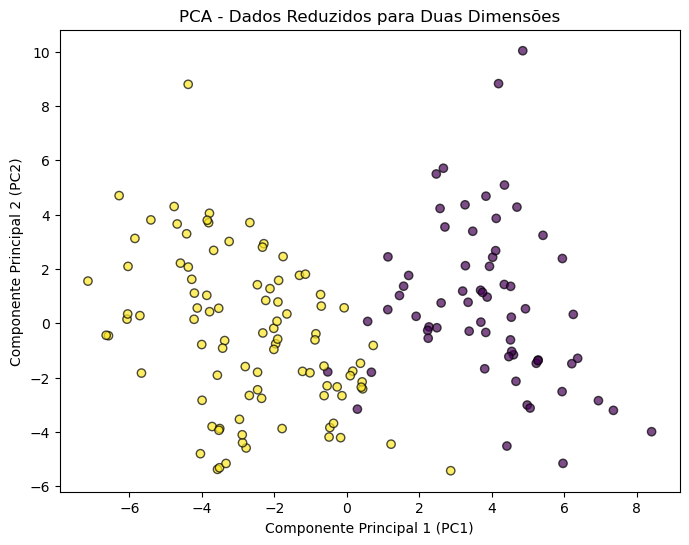

In [ ]:
df1 = df.copy()
# Separar as features (X) e a variável de destino (y), se houver

X = df.drop(columns=['Class'])

# Padronizar e aplicar o PCA diretamente no DataFrame
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Criar um novo DataFrame com os componentes principais
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])



# Visualizar os dados reduzidos para duas dimensões
plt.figure(figsize=(8, 6))
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df1['Class'], cmap='viridis', edgecolor='k', alpha=0.7)
plt.title('PCA - Dados Reduzidos para Duas Dimensões')
plt.xlabel('Componente Principal 1 (PC1)')
plt.ylabel('Componente Principal 2 (PC2)')
plt.show()


In [ ]:

# carregandop arquivo
arquivo_excel = './datasets/train.csv'

# pegando dados do Excel
data = pd.read_csv(arquivo_excel)

df = pd.DataFrame(data)
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0


In [ ]:
# renomeando coluna de rotulo 
df.rename(columns={'income_>50K': 'Class'}, inplace=True)
# Lista de nomes de colunas para dropar
colunas_para_dropar = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race',  'native-country']

# Função para mapear os valores da coluna 'class' para 0 ou 1
def rotulo_binario(valor):
    return 0 if valor == 'Male' else 1

# Aplicar a função à coluna 'localidade' e criar uma nova coluna chamada 'rotulo'
df['gender'] = df['gender'].apply(lambda x: rotulo_binario(x))

df


# Dropar as colunas especificadas
df_sem_colunas = df.drop(colunas_para_dropar, axis=1)
df_sem_colunas

df_cortado = df_sem_colunas[:2000]

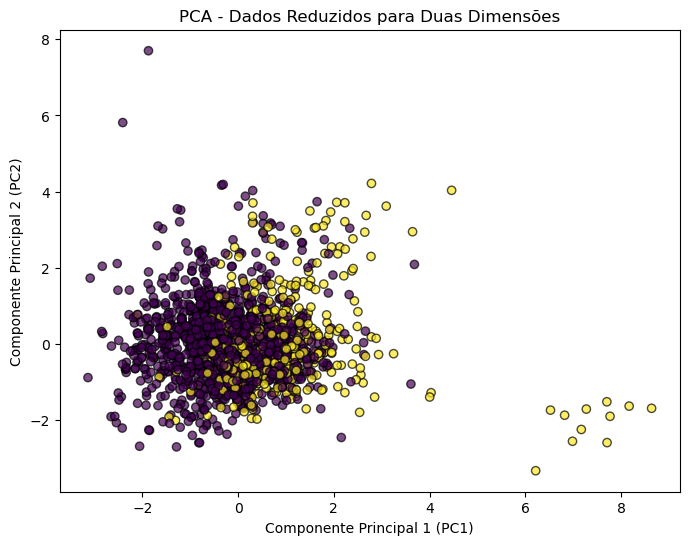

In [ ]:
# Separar as features (X) e a variável de destino (y)
Y = df_cortado['Class']
X = df_cortado.drop(columns=['Class'])

# Padronizar e aplicar o PCA diretamente no DataFrame
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Criar um novo DataFrame com os componentes principais
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])



# Visualizar os dados reduzidos para duas dimensões
plt.figure(figsize=(8, 6))
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=Y, cmap='viridis', edgecolor='k', alpha=0.7)
plt.title('PCA - Dados Reduzidos para Duas Dimensões')
plt.xlabel('Componente Principal 1 (PC1)')
plt.ylabel('Componente Principal 2 (PC2)')
plt.show()

## __Citrus Dataset__

https://www.kaggle.com/datasets/joshmcadams/oranges-vs-grapefruit

In [ ]:

# carregandop arquivo
arquivo_excel = './datasets/citrus.csv'

# pegando dados do Excel
data = pd.read_csv(arquivo_excel)

df = pd.DataFrame(data)
df.head()

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9


In [ ]:
df= df.sample( frac=1, random_state=42)  # frac=1 significa embaralhar todas as linhas
df = df[:1000]
df

,name,diameter,weight,red,green,blue
6252,grapefruit,10.66,184.37,166,60,18
4684,orange,10.40,181.34,166,109,13
1731,orange,7.99,145.45,150,72,2
4742,orange,10.55,182.99,151,84,2
4521,orange,10.10,177.31,160,72,2
...,...,...,...,...,...,...
3921,orange,9.45,167.78,166,71,4
6685,grapefruit,10.95,189.34,150,82,2
3194,orange,8.91,159.46,185,74,20
1941,orange,8.13,147.57,166,89,21


In [ ]:
# Função para mapear os valores da coluna 'class' para 0 ou 1
def rotulo_binario(valor):
    return 0 if valor == 'orange' else 1

# Aplicar a função à coluna 'localidade' e criar uma nova coluna chamada 'rotulo'
df['name'] = df['name'].apply(lambda x: rotulo_binario(x))


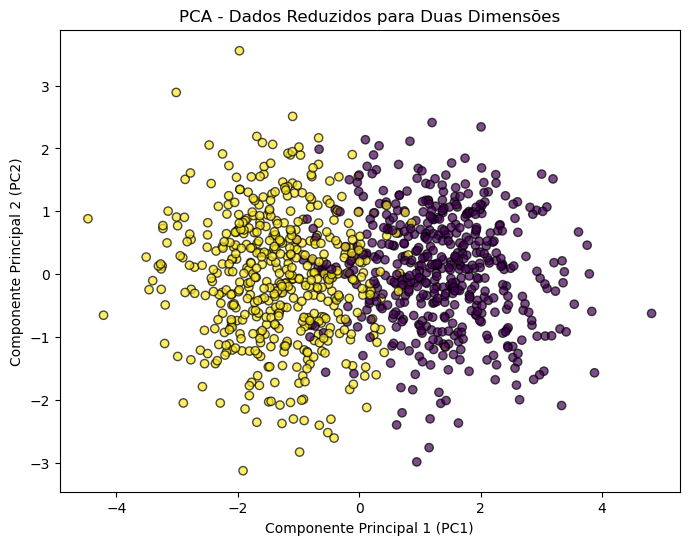

In [ ]:
# Separar as features (X) e a variável de destino (y)
Y = df['name']
X = df.drop(columns=['name'])

# Padronizar e aplicar o PCA diretamente no DataFrame
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Criar um novo DataFrame com os componentes principais
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])



# Visualizar os dados reduzidos para duas dimensões
plt.figure(figsize=(8, 6))
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=Y, cmap='viridis', edgecolor='k', alpha=0.7)
plt.title('PCA - Dados Reduzidos para Duas Dimensões')
plt.xlabel('Componente Principal 1 (PC1)')
plt.ylabel('Componente Principal 2 (PC2)')
plt.show()

In [ ]:
df

,name,diameter,weight,red,green,blue
6252,1,10.66,184.37,166,60,18
4684,0,10.40,181.34,166,109,13
1731,0,7.99,145.45,150,72,2
4742,0,10.55,182.99,151,84,2
4521,0,10.10,177.31,160,72,2
...,...,...,...,...,...,...
3921,0,9.45,167.78,166,71,4
6685,1,10.95,189.34,150,82,2
3194,0,8.91,159.46,185,74,20
1941,0,8.13,147.57,166,89,21
